a. Agrupamento por tipo de bebidas:
Beverage Types
Beer       24
Other      28
Spirits    21
Wine       27

b. Agrupamento por Região e por Ano:
WHO region             Year
Africa                 1984    4
                       1985    9
                       1986    4
                       1987    6
                       1989    6
Americas               1984    2
                       1985    1
                       1986    6
                       1987    5
                       1989    5
Eastern Mediterranean  1984    5
                       1985    1
                       1986    3
                       1987    5
                       1989    4
Europe                 1984    4
                       1985    6
                       1986    6
                       1987    3
                       1989    3
South-East Asia        1984    1
                       1985    1
                       1986    2
Western Pacific        1984    2
                       1985    2
  

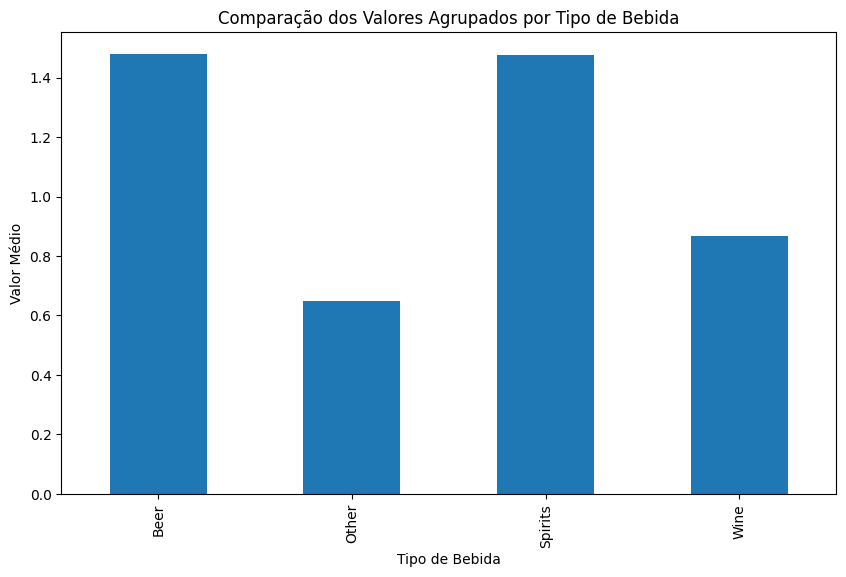


E) i. Mostrando a coluna de bebidas do ano de 1985:
Wine
Spirits
Beer
Spirits
Other
Wine
Other
Spirits
Other
Other
Other
Other
Beer
Spirits
Other
Wine
Wine
Spirits
Wine
Wine

E) ii. Mostrando a coluna de Região com valores acima de 4:
WHO region  Display Value
  Americas           4.27
    Africa           6.10
  Americas           4.51
    Africa           4.48
    Europe           6.82
    Europe           5.10
    Europe           4.43
    Europe           7.38


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dados = pd.read_csv('/world_alcohol.csv')

grupo_bebidas = dados.groupby('Beverage Types')
print("a. Agrupamento por tipo de bebidas:")
print(grupo_bebidas.size().to_string())
print()

grupo_regiao_ano = dados.groupby(['WHO region', 'Year'])
print("b. Agrupamento por Região e por Ano:")
print(grupo_regiao_ano.size().to_string())
print()

contagem_regioes = dados['WHO region'].nunique()
contagem_paises = dados['Country'].nunique()
soma_valores_bebida = dados.groupby('Beverage Types')['Display Value'].sum()

print("c. Seção de Contagens")
print()
print("Ocorrência de Regiões:")
print(dados['WHO region'].value_counts().to_string())
print("\nOcorrência de Países:", contagem_paises)
print("\nSoma da coluna de valores por Bebida:")
print(soma_valores_bebida.to_string())
print()

media_valores = dados['Display Value'].mean()
moda_valores = dados['Display Value'].mode().iloc[0]
mediana_valores = dados['Display Value'].median()
estatisticas_descritivas = dados['Display Value'].describe()

print("D) i. Análises estatísticas da coluna de valores:")
print(f"Média: {media_valores:.2f}")
print(f"Moda: {moda_valores:.2f}")
print(f"Mediana: {mediana_valores:.2f}")
print()
print("D) ii. Estatística Descritiva:")
print(estatisticas_descritivas.round(2))
print()

plt.figure(figsize=(10, 6))
grupo_bebidas['Display Value'].mean().plot(kind='bar')
plt.xlabel('Tipo de Bebida')
plt.ylabel('Valor Médio')
plt.title('Comparação dos Valores Agrupados por Tipo de Bebida')
plt.show()

print()
bebidas_1985 = dados.loc[dados['Year'] == 1985, 'Beverage Types']
bebidas_1985_str = '\n'.join(bebidas_1985)

print("E) i. Mostrando a coluna de bebidas do ano de 1985:")
print(bebidas_1985_str)
print()

regioes_acima_de_4 = dados.loc[dados['Display Value'] > 4, ['WHO region', 'Display Value']]

print("E) ii. Mostrando a coluna de Região com valores acima de 4:")
print(regioes_acima_de_4.to_string(index=False))

a. Dados limpos:
       grau    turno  mensalidade  bolsa_integral_cotas  bolsa_integral_ampla  bolsa_parcial_cotas  bolsa_parcial_ampla        curso_id curso_busca cidade_busca uf_busca    cidade_filtro                         universidade_nome                                                campus_nome  campus_id       nome  nota_integral_ampla  nota_integral_cotas  nota_parcial_ampla  nota_parcial_cotas
Bacharelado Integral      9999.99                  15.0                  14.0                  0.0                  0.0    706710394154    Medicina Campo Grande       MS NTAwMjAwNDAyNzA0         Universidade Anhanguera - UNIDERP                         CAMPO GRANDE - SEDE - Miguel Couto     706710   Medicina               740.22               726.46                0.00                0.00
Bacharelado  Noturno      9836.40                   1.0                   0.0                  0.0                  0.0 104191210567043  Enfermagem      Crateus       CE MjMwNDAxODA0MTAz         Facu

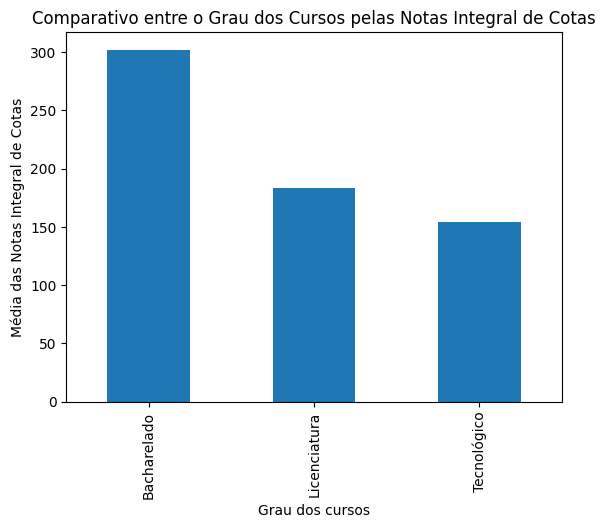

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vitorraangeldp/prouni-2018/main/cursos-prouni.csv'
df = pd.read_csv(url)

df.fillna(0.0, inplace=True)

print("a. Dados limpos:")
print(df.head().to_string(index=False))

grau_grouped = df.groupby('grau')
print("\nb. Agrupamento por grau:\n", grau_grouped.size())

cursos_grouped = df[df['curso_busca'].isin(['Matemática', 'Medicina', 'Pedagogia'])].groupby('curso_busca')
print("\nc. Agrupamento pelos cursos de Matemática, Medicina e Pedagogia:\n", cursos_grouped.size())

estado_grouped = df.groupby('uf_busca')['nota_integral_cotas'].mean()
print("\nd. Média de notas de corte por Estado:\n", estado_grouped)

tecnologicos_grouped = df[df['grau'] == 'Tecnológico'].groupby('curso_busca')
print("\ne. Agrupamento pelos cursos Tecnológicos:\n", tecnologicos_grouped.size())

df_sem_cidade_filtro = df.drop('cidade_filtro', axis=1)
print("\n. DataFrame sem a coluna 'cidade_filtro':")
print(df_sem_cidade_filtro.head().to_string(index=False))

media_mensalidades_medicina = df[df['curso_busca'] == 'Medicina']['mensalidade'].mean()
print("\ng. Média das mensalidades dos cursos de Medicina: {:.2f}".format(media_mensalidades_medicina))

media_notas_integral = df[df['turno'] == 'Integral']['nota_integral_cotas'].mean()
media_notas_integral = round(media_notas_integral, 3)
print("\nh. Média das notas de corte dos cursos de tempo integral:", media_notas_integral)

estatisticas_notas_bacharelado = df[df['grau'] == 'Bacharelado']['nota_integral_ampla'].describe()
print("\ni. Estatísticas descritivas das Notas Integral Ampla dos cursos de Bacharelado:")
print()
print(estatisticas_notas_bacharelado.to_string(name=True))
print()

df_grau_media = df.groupby('grau')['nota_integral_cotas'].mean()
df_grau_media.plot(kind='bar')
plt.xlabel('Grau dos cursos')
plt.ylabel('Média das Notas Integral de Cotas')
plt.title('Comparativo entre o Grau dos Cursos pelas Notas Integral de Cotas')
plt.show()